### This is script for comparing methods for finding middle slice in a z-stack using either the standard deviation or the shannon entropy of the discrete cosine transform


### Much of this is a somewhat cleaned up version of the find_mid_slice.ipynb. It finds the middle slice through determining the max shannon entropy of the distinct cosine transformation. 

In [1]:
import os
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import dct

In [2]:
'''this is most recent verion of this function as of 04-17-20. This updated version can change to different directories. it also returns arrays that are the
appropriate data type'''
def make_z_stack(num_channels, directory = os.getcwd(), bit_depth = 'uint16'):
    
    ###Get home directory to switch back to at the end
    home_dir = os.getcwd()
    
    #change to directory that has set of .tiff files
    if directory != os.getcwd():
        os.chdir(directory)
    
    #the data type that you would like the final images to be
  #  if bit_depth == 16:
  #      bit = 'uint16'
  #  if bit_depth == 8:
  #      bit = 'uint8'
  #  if bit_depth ==:
  #      bit = np.float32
    bit = bit_depth
        
        
    ## if stupid Thumbs.db is present in the file then this will remove it
    if 'Thumbs.db' in os.listdir():
        os.remove('Thumbs.db')
        
    
    ###generate list of sorted images
    image_lst = np.sort(os.listdir())
    ### figure out shape of empty zeros array for image
    img_ = io.imread(image_lst[0])
    n_row = img_.shape[0]
    n_col = img_.shape[1]
    n_plane = int(len(image_lst) / num_channels)
    #shape_tupple = np.zeros((n_z, n_row, n_col))
    
    ### generate some empyt arrays to be filled up
    c1_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c2_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c3_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c4_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c5_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    
    ###read in and generate z-stack for each channel
    z_slice = 0
    for i in range(0 , (len(image_lst))- num_channels, num_channels):
        if num_channels == 1:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
        if num_channels == 2:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
        if num_channels == 3:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
            c3_img[z_slice, :, :] = io.imread(image_lst[i + 2])
        if num_channels == 4:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
            c3_img[z_slice, :, :] = io.imread(image_lst[i + 2])
            c4_img[z_slice, :, :] = io.imread(image_lst[i + 3])
        if num_channels == 5:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
            c3_img[z_slice, :, :] = io.imread(image_lst[i + 2])
            c4_img[z_slice, :, :] = io.imread(image_lst[i + 3])
            c5_img[z_slice, :, :] = io.imread(image_lst[i + 4])
        z_slice += 1
     
    ###change back to original directory
    os.chdir(home_dir)
    
    
    if num_channels == 1:
        c1_img = c1_img.astype(bit)
        return(c1_img)
    if num_channels == 2:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        return(c1_img, c2_img)
    if num_channels == 3:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        c3_img = c2_img.astype(bit)
        return(c1_img, c2_img, c3_img)
    if num_channels == 4:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        c3_img = c3_img.astype(bit)
        c4_img = c4_img.astype(bit)
        return(c1_img, c2_img, c3_img, c4_img)

    if num_channels  == 5:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        c3_img = c3_img.astype(bit)
        c4_img = c4_img.astype(bit)
        c5_img = c5_imglastype(bit)
        return(c1_img.astype(bit), c2_img.astype(bit), c3_img.astype(bit), c4_img.astype(bit), c5_img.astype(bit))


In [3]:
'''This will calculate and return the shannon entropy of the normalized discrete cosine transform. This is 
taken from strategy used in doi: 10.1038/nbt.3708. takes in a 2D array and spits out a scaler, the dcst.
'''
def dcts(img_):
    dis_cos = dct(img_) #take the discrete cosine transform of the image
    l2 = np.sqrt(np.sum(np.square(img_))) #perform l2 normalization
    inner_term = np.divide(dis_cos, l2) #inner term of the shannon enropy
    '''need to get rid of any zeros that occur in inner term'''
    inner_term[inner_term == 0] = .0001
    first_term = np.abs(inner_term) #first term of shannon entropy
    second_term = np.log2(np.abs(inner_term)) #second term of shannon entropy 
    return(np.multiply(-1, np.sum(np.multiply(first_term, second_term))))
    #return(second_term)
                        

In [17]:
c1, c2, c3, c4 = make_z_stack(4, r'D:\200217_adipogen_zstacks\stad442\xy01', bit_depth = np.float32)

In [18]:
'''this iterates over each of the stacks and pulls out the dcts and the std of each slice and places them into
respective lists'''

#lists to be populated with the dcts of each channel
c1_dcts_lst = []
c2_dcts_lst = []
c3_dcts_lst = []
c4_dcts_lst = []

#lists to be populated with the std of each channel
c1_std_lst = []
c2_std_lst = []
c3_std_lst = []
c4_std_lst = []


for i in range(44):
    c1_slice  = c1[i, :, :]
    c2_slice = c2[i, :, :]
    c3_slice = c3[i, :, :]
    c4_slice = c4[i, :, :]
    
    c1_dcts_lst.append(dcts(c1_slice))
    c2_dcts_lst.append(dcts(c2_slice))
    c3_dcts_lst.append(dcts(c3_slice))
    c4_dcts_lst.append(dcts(c4_slice))
    
    c1_std_lst.append(np.std(c1_slice.flatten()))
    c2_std_lst.append(np.std(c2_slice.flatten()))
    c3_std_lst.append(np.std(c3_slice.flatten()))
    c4_std_lst.append(np.std(c4_slice.flatten()))
    

In [12]:
%matplotlib qt

In [23]:
slice_lst = list(range(44))
ax = plt.plot(slice_lst, c1_std_lst)
ax = plt.plot(slice_lst, c2_std_lst)
ax = plt.plot(slice_lst, c3_std_lst)
ax = plt.plot(slice_lst, c4_std_lst)
plt.legend(['cebp_b', 'cjun', 'rnap', 'dapi'])


In [20]:
temp_dict = {'cebp_b' : int((np.argwhere(c1_std_lst == np.max(c1_std_lst)))),
             'klf4' : int((np.argwhere(c2_std_lst == np.max(c2_std_lst)))),
             'cdk8' : int((np.argwhere(c3_std_lst == np.max(c3_std_lst)))),
             'dapi' : int((np.argwhere(c4_std_lst == np.max(c4_std_lst))))}
print(temp_dict)

{'cebp_b': 0, 'klf4': 0, 'cdk8': 0, 'dapi': 0}


In [22]:
slice_lst = list(range(44))
ax = plt.plot(slice_lst, c1_dcts_lst)
ax = plt.plot(slice_lst, c2_dcts_lst)
ax = plt.plot(slice_lst, c3_dcts_lst)
ax = plt.plot(slice_lst, c4_dcts_lst)
plt.legend(['cebp_b', 'cjun', 'rnap', 'dapi'])

In [24]:
dcts_dict = {'cebp_b' : int((np.argwhere(c1_dcts_lst == np.max(c1_dcts_lst)))),
             'klf4' : int((np.argwhere(c2_dcts_lst == np.max(c2_dcts_lst)))),
             'cdk8' : int((np.argwhere(c3_dcts_lst == np.max(c3_dcts_lst)))),
             'dapi' : int((np.argwhere(c4_dcts_lst == np.max(c4_dcts_lst))))}
print(dcts_dict)

{'cebp_b': 25, 'klf4': 26, 'cdk8': 24, 'dapi': 25}


In [142]:
ax = plt.plot(list(range(44)), c1_dcts_lst, color = 'b')

In [144]:
np.argwhere(c1_dcts_lst == np.max(c1_dcts_lst))

array([[29]], dtype=int64)

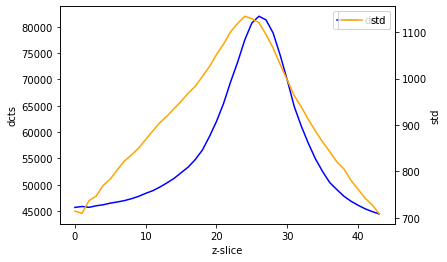

In [133]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(list(range(44)), c1_dcts_lst, color = 'b', label = 'dcts')

ax2.plot(list(range(44)), c1_std_lst, color = 'orange', label = 'std')

ax1.set_xlabel('z-slice')
ax1.set_ylabel('dcts')
ax2.set_ylabel('std')

#plt.legend(['dcts', 'std'])
ax1.legend(loc = 0)
ax2.legend()
plt.show()

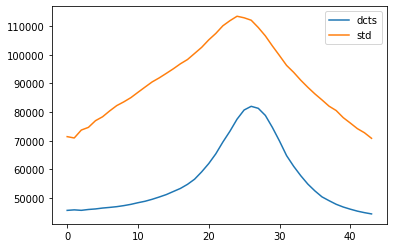

In [124]:
ax = plt.subplot(111)

ax.plot(list(range(44)), c1_dcts_lst, label = 'dcts')
ax.plot(list(range(44)), np.multiply(c1_std_lst, 100), label = 'std * 150')
ax.legend()

In [75]:
np.argwhere(c1_std_lst == np.max(c1_std_lst))

array([[23]], dtype=int64)

In [79]:
np.argwhere(c1_dcts_lst == np.max(c1_dcts_lst))

array([[25]], dtype=int64)

In [ ]:
c1_dc

In [45]:
c13 = c1[21, :, :]

In [46]:
dcts(c13)

C:\Users\timdaugird\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
C:\Users\timdaugird\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


nan

In [47]:
jnk_ = dct(c13)

In [48]:
l2_jnk = np.sqrt(np.sum(np.square(jnk_)))

In [51]:
inner_term = np.divide(jnk_, l2_jnk)


In [53]:
np.min(inner_term)

-0.010719897

In [54]:
first_term = np.abs(inner_term)
second_term = np.log2(np.abs(inner_term))

C:\Users\timdaugird\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


In [55]:
second_term = np.log2(np.abs(inner_term))

C:\Users\timdaugird\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [56]:
np.min(np.abs(inner_term))

0.0

In [63]:
np.argwhere(inner_term == 0)

array([[1195, 1721]], dtype=int64)

In [60]:
np.abs(-0.01071)

0.01071